# Card Game Project

**Please execute all the codes IN ORDER, this is very important.**

## Game Design(Version1)

Card game is a kind of traditional game. Usually, players need to randomly draw cards from the deck and play them in each round. Our card game adds more gameplay to the traditional card game, which includes these following elements:
1. Cards

  a. Basic Cards

    - Normal Cards
    - Skill Cards

  b. Judgement Card

2. Special Mechanism

Therefore, we will introduce these elements and the game rules to you and implement them in Python.

### Game Implementation


(Initialize some basic items)

In [ ]:
import random as rd

class Card:

  def __init__(self, **kwargs):
    self.name = "card"
    self.value = 0

  def __str__(self):
    return self.name

  def execute(self, *players):
    pass

#### Basic Cards

Basic cards are cards that players can draw each round and use as their own hand cards.

In [ ]:
class Basic_Card(Card):

  def __init__(self, player, **kwargs):
    super().__init__()
    self.player = player
    self.type = kwargs["type"]

Basic card includes two kinds of cards: normal cards and skill cards.

##### Normal Cards

There are 6 types of normal cards:
1. Attack Air Card (atk air ard): Use on the enemy to deal 2 points of damage, whose attack range is air.
2. Attack Land Card (atk land card): Use on the enemy to deal 2 points of damage, whose attack range is land.
3. Defense Level 1 Air Card (def 1 air card): Can resist 1 point of local damage, whose defense range is air.
4. Defense Level 2 Air Card (def 2 air card): Can resist 2 point of local damage, whose defense range is air.
5. Defense Level 1 Land Card (def 1 land card): Can resist 1 point of local damage, whose defense range is land.
6. Defense Level 2 Land Card (def 2 land card): Can resist 2 point of local damage, whose defense range is land.

And one of the important rule here is that if the range of attack card and the defense card are different, defense card will not work.

In [ ]:
class Normal_Card(Basic_Card):

  def __init__(self, player, **kwargs):
    super().__init__(player, **kwargs)
    self.player = player

    self.range: str = kwargs["range"]  # "air" "land"
    # self.type: str = kwargs["type"]  # "def" "atk"
    self.name = " ".join([kwargs["type"], kwargs["range"], "card"])
    try:
      self.level: int = kwargs["level"]  # 1(low) 2(high)
      self.name = " ".join([kwargs["type"], str(kwargs["level"]), kwargs["range"], "card"])
    except KeyError:
      pass

    if self.type == "def":
      self.value = self.level
    elif self.type == "atk":
      self.value = -2

  def execute(self, random_num):
    if self.type == "def" and self.player.enemy.card.type == "atk" and self.range == self.player.enemy.card.range:
      if self.player.skill.type == "comprehensive_def":
        self.player.hp += 2
        self.player.skill.life = 0
      else:
        self.player.hp += self.value
    elif self.type == "def" and self.player.enemy.card.type == "atk" and self.range != self.player.enemy.card.range:
      if self.player.skill.type == "comprehensive_def":
        self.player.hp += 2
        self.player.skill.life = 0
      elif rd.random() < 0.5:
        self.player.hp += 1
        return True
    elif self.type == "atk" and self.player.enemy.card.type != "atk":
      self.player.enemy.hp += self.value
    elif self.type == self.player.enemy.card.type == "atk":
      if self.player.skill.type == "fierce_attack" and self.player.enemy.skill.type != "fierce_attack":
        self.player.enemy.hp -= 1
        self.player.skill.life = 0
      elif self.player.skill.type != "fierce_attack" and self.player.enemy.skill.type != "fierce_attack":
        self.player.enemy.hp += self.value
      elif self.player.skill.type == "fierce_attack" and self.player.enemy.skill.type == "fierce_attack":
        self.player.enemy.hp -= 1
        self.player.skill.life = 0
    elif self.type == self.player.enemy.card.type == "def":
      if random_num < 0.5:
        self.player.hp += 1
        return True
    return False

##### Skill Cards

Skill cards can provide players with tactical skills. They can be installed in the player's skill area. They will automatically take effect when the conditions for use are met. They will become invalid after one use. If the skill card is not used within two rounds after being in the skill area, it will also become invalid.

Skill cards include the following four types:
1. Comprehensive Defense Card: When receiving enemy damage, using any level or range of defense cards will generate 2 points of defense effect.
2. Impeccable Card: When the judgment card is true, it will makes the judgment card invalid for all players.
3. First Aid Card: When the health is lower than (when dying), it will reset health to 1.
4. Fierce Attack Card: If both players use attack cards, the enemy will be damaged by 1 point, and the player himself will not be damaged. If both players have this skill equipped, both players will be damaged by 1 point.

(The effects of skill cards will be implemented in other related codes)

In [ ]:
class Skill_Card(Basic_Card):
  """
  comprehensive_def, impeccable, first_aid, fierce_attack, none
  """

  def __init__(self, player, **kwargs):
    super().__init__(player, **kwargs)
    self.life = 2
    self.name = self.type + " card"

  def __str__(self):
    return self.name + " " + str(self.life)

#### Judgement Card

The judgment card is drawn by all players and is effective for all players. Each card has its own special effectiveness probability, and this probability will change according to the number of rounds.

There are 4 kinds of judgement cards:
1. Restore Card: When effective, all players recover 1 health point. The probability of it taking effect in rounds 1 to 5 is 0.8, the probability of it taking effect in rounds 5 to 10 is 0.5, and the probability of it taking effect after round 10 is 0.1.
2. Airstrike Card: When effective, all players cause 1 damage. The probability of it taking effect in rounds 1 to 5 is 0.2, the probability of it taking effect in rounds 5 to 10 is 0.5, and the probability of it taking effect after round 10 is 0.8.
3. Lightning Card: When effective, randomly select one player and cause him 1 damage. The probability of it taking effect in rounds 1 to 5 is 0.5 and the probability of it taking effect after round 5 is 1.
4. Famine Card: When effective, all players should discard one hand cards. The probability of it taking effect in rounds 1 to 5 is 0.2, the probability of it taking effect in rounds 5 to 10 is 0.5, and the probability of it taking effect after round 10 is 0.8.

In [ ]:
class Judgement_Card(Card):

  def __init__(self):
    super().__init__()
    self.probability = 0.5

  def update(self, counter):
    if counter < 5:
      self.probability = 0.2
    elif counter < 10:
      self.probability = 0.5
    else:
      self.probability = 0.8


class Lightning_Card(Judgement_Card):

  def __init__(self):
    super().__init__()
    self.type = "lightning"
    self.name = " ".join([self.type, "card"])
    self.value = -1

  def execute(self, *players):
    if rd.random() < self.probability:
      for p in players:
        if p.skill.type == "impeccable":
          p.skill.life = 0
          return False
      player = rd.choice(players)
      player.hp += self.value
      return player.name
    return False

  def update(self, counter):
    if counter < 5:
      self.probability = 0.5
    else:
      self.probability = 1


class Airstrike_Card(Judgement_Card):

  def __init__(self):
    super().__init__()
    self.type = "airstrike"
    self.name = " ".join([self.type, "card"])
    self.value = -1

  def execute(self, *players) -> bool:
    if rd.random() < self.probability:
      for p in players:
        if p.skill.type == "impeccable":
          p.skill.life = 0
          return False
      for p in players:
        p.hp += self.value
      return True
    return False


class Restore_Card(Judgement_Card):

  def __init__(self):
    super().__init__()
    self.type = "restore"
    self.name = " ".join([self.type, "card"])
    self.value = 1

  def execute(self, *players) -> bool:
    if rd.random() < self.probability:
      for p in players:
        if p.skill.type == "impeccable":
          p.skill.life = 0
          return False
      for p in players:
        p.hp += self.value
      return True
    return False

  def update(self, counter):
    if counter < 5:
      self.probability = 0.8
    elif counter < 10:
      self.probability = 0.5
    else:
      self.probability = 0.1


class Famine_Card(Judgement_Card):

  def __init__(self):
    super().__init__()
    self.type = "famine"
    self.name = " ".join([self.type, "card"])

  def execute(self, *players) -> bool:
    if rd.random() < self.probability:
      for p in players:
        if p.skill.type == "impeccable":
          p.skill.life = 0
          return False
      for p in players:
        if p.cards:
          card_index = rd.randint(0, len(p.cards) - 1)
          p.cards.pop(card_index)
      return True
    return False

#### Mechanism


Our card game has two special mechanism:

1. **Different range of attack and defense**: When one player plays a defense card and the other player plays an attack card, but the card ranges of the players are different, the defender has a 0.5 probability of gaining 1 point of defense.
2. **Both Defense**: When both players play defense cards, there is a 0.5 chance that both players will recover 1 HP.

The code implementation of mechanism is integrated in the "execute" method of class "Normal_Card".

#### Player

The player in our card game has these key features:

1. **Hit Points (HP)**: 5
2. **Hand Cards**: At most 4 cards. All of the hands cards should be basic cards, including normal cards and skill cards. Enemy can not know your hand cards. Once the number is exceeded, the player must discard some cards.
3. **Equipped Skill Cards**: At most 1 card. Once equipped, the skill will be automatically triggered if the conditions are met and then become invalid. If it is not triggered within two rounds after equipped, it will become invalid.

In [ ]:
class Player:

  def __init__(self, name="player"):
    self.name = name
    self.hp_max = 5
    self.hp = self.hp_max
    self.cards_max = 4
    self.cards = []
    self.skill = Skill_Card(self, type="none")
    self.enemy = None
    self.card = Normal_Card(self, type="none", range="")

  def __str__(self):
    return self.name

  def set_enemy(self, enemy):
    self.enemy = enemy

  def play_card(self, card_index):
    self.card = self.cards.pop(card_index)

  def get_basic_cards(self, num):
    for i in range(num):
      random_num = rd.random()
      if random_num < 0.6:
        rd_num = rd.random()
        if rd_num < 0.25:
          self.cards.append(Normal_Card(self, type="atk", range="air"))
        elif rd_num < 0.5:
          self.cards.append(Normal_Card(self, type="atk", range="land"))
        elif rd_num < 0.625:
          self.cards.append(Normal_Card(self, type="def", level=1, range="air"))
        elif rd_num < 0.75:
          self.cards.append(Normal_Card(self, type="def", level=2, range="air"))
        elif rd_num < 0.875:
          self.cards.append(Normal_Card(self, type="def", level=1, range="land"))
        else:
          self.cards.append(Normal_Card(self, type="def", level=2, range="land"))
      else:
        self.cards.append(rd.choice([Skill_Card(self, type="comprehensive_def"),
                        Skill_Card(self, type="first_aid"),
                        Skill_Card(self, type="impeccable"),
                        Skill_Card(self, type="fierce_attack")]))

  def fold(self, card_index):
    try:
      self.cards.pop(card_index)
    except IndexError:
      pass

  def is_full(self) -> bool:
    return len(self.cards) > self.cards_max

  def update_hp(self):
    self.hp = min(self.hp, self.hp_max)
    if 0 >= self.hp == self.enemy.hp <= 0:
      self.hp = 1
      self.enemy.hp = 1

  def get_skill_cards(self) -> list:
    return [i for i in self.cards if isinstance(i, Skill_Card)]

  def get_normal_cards_index(self):
    return [i for i in range(len(self.cards)) if isinstance(self.cards[i], Normal_Card)]

  def skip(self):
    self.card = Normal_Card(self, type="skip", range="")

#### Winning and Losing Rules

1. If the HP of player 1 has been smaller or equal to 0 and the HP of player 2 is greater than 0, then player 2 is the winner.
2. If both HP of player 1 and 2 is smaller or equal to 0, then the player whose HP is higher is the winner.
3. If both HP of player 1 and 2 is smaller or equal to 0 and their HP are the same, then both of their HP will be reset to 1 and continue the game until there is a winner.

#### Prophecy

Prophecy is only performed in the first round, which follows these rule:

1. Players need to predict the type of judgment card that will appear during the judgment phase.
2. If the prediction is successful, the enemy will suffer 1 damage, and if the prediction fails, the player himself will suffer 1 damage.

#### Round

At the beginning of the game, the players will get 2 cards.

Single round include these parts:

1. **Prophecy round**: For player who play first can prophecing the first round judgement card, if prophecy is right, the opponent get 1HP hurt, vice versa.
2. **Draw Cards**: Each player draw 1 basic card (normal card or skill card). If the number of player's hand cards has exceeds 4, then player should discard some cards.
3. **Equip Skill Card**: The players can equip 1 skill cards or replace the equipped skill card to a new one.
4. **Play Cards**: Players should play 1 basic card **at the same time** from their hand cards. And then determine the effectiveness of the cards and the mechanism, and update the HP of both players.
5. **Judgement**: Players should draw 1 judgement card together and determine whether the judgement card is triggered. And then update the HP of both players.
6. **End of the Round**:
  - Check if any equipped skill is not triggered within two rounds. If any, then that equipped skill will become invalid.
  - Update the probability of judgement cards according to the number of round.
  - Check if anyone has won. If not, start a new round.

#### Different format of playing

We wrote programs for three different format of playing, including computer versus computer,player versus computer, and player versus player.

For computer versus player and player versus player games, the player input follow these rules:
1. In the card selection stage (including playing cards and equip skill cards), the player should enter the index of the card they want use and the index start from 0.
2. If the player do not want to equip skill or make a prophecy in a round, the player should enter "none".

In [ ]:
class Round:

  def __init__(self):
    self.player1 = Player("p1")
    self.player2 = Player("p2")
    self.player1.set_enemy(self.player2)
    self.player2.set_enemy(self.player1)
    self.players = [self.player1, self.player2]
    for p in self.players:
      p.get_basic_cards(2)
    self.counter = 0

  @staticmethod
  def get_judgement_card() -> Judgement_Card:
    return rd.choice([Airstrike_Card(), Famine_Card(), Lightning_Card(), Restore_Card()])

  def run(self, mode="c2c", log=1) -> tuple:
    """
    mode:
      "c2c": computer versus computer
        self.player1: computer
        self.player2: computer
      "c2p": computer versus player
        self.player1: computer
        self.player2: player
      "p2p": player versus player
        self.player1: player
        self.player2: player
    log:
      0: no log
      1: detailed log
      2: simple log
    """
    first_round = True
    while True:
      self.counter += 1

      # Draw cards and fold
      if mode == "c2c":
        for p in self.players:
          p.get_basic_cards(2)
          while p.is_full():
            p.fold(rd.randint(0, len(p.cards) - 1))
      elif mode == "p2p":
        for p in self.players:
          p.get_basic_cards(2)
          while True:
              try:
                p.fold(int(input("Please fold: " + str([str(i) for i in p.cards]))))
                if p.is_full():
                  continue
                else:
                  break
              except Exception:
                continue
      elif mode == "c2p":
        for p in self.players:
          p.get_basic_cards(2)
        while self.player1.is_full():
          self.player1.fold(rd.randint(0, len(self.player1.cards) - 1))
        while True:
          try:
            self.player2.fold(int(input("Please fold: " + str([str(i) for i in self.player2.cards]))))
            if self.player2.is_full():
              continue
            else:
              break
          except Exception:
            continue

      if log == 1:
        print("\nDraw cards:")
        print("\np1: " + str([str(i) for i in self.player1.cards]) + " | Skill: " + str(
            self.player1.skill) + " | HP: " + str(self.player1.hp))
        print("\np2: " + str([str(i) for i in self.player2.cards]) + " | Skill: " + str(
            self.player2.skill) + " | HP: " + str(self.player2.hp))
        print("\n")

      # Equip skills
      if mode == "c2c":
        for p in self.players:
          skill_cards = p.get_skill_cards()
          if skill_cards and rd.random() < 0.5:
            p.skill = rd.choice(skill_cards)
            p.cards.remove(p.skill)
      elif mode == "p2p":
        for p in self.players:
          skill_cards = p.get_skill_cards()
          while True:
            user_input = input("Equip your skill: " + str([str(i) for i in skill_cards]))
            if user_input != "none":
              try:
                p.skill = skill_cards[int(user_input)]
              except Exception:
                continue
              p.cards.remove(p.skill)
              break
            elif user_input == "none":
              break
      elif mode == "c2p":
        skill_cards = self.player1.get_skill_cards()
        if skill_cards and rd.random() < 0.5:
          self.player1.skill = rd.choice(skill_cards)
          self.player1.cards.remove(self.player1.skill)

        skill_cards = self.player2.get_skill_cards()
        while True:
            user_input = input("Equip your skill: " + str([str(i) for i in skill_cards]))
            if user_input != "none":
              try:
                p.skill = skill_cards[int(user_input)]
              except Exception:
                continue
              p.cards.remove(p.skill)
              break
            elif user_input == "none":
              break

      if log == 1:
        print("Equip skills:")
        print("\np1: " + str([str(i) for i in self.player1.cards]) + " | Skill: " + str(
            self.player1.skill) + " | HP: " + str(self.player1.hp))
        print("\np2: " + str([str(i) for i in self.player2.cards]) + " | Skill: " + str(
            self.player2.skill) + " | HP: " + str(self.player2.hp))
        print("\n")

      # Play cards
      # Player1
      if not (self.player1.get_normal_cards_index() == []):
        if mode == "c2c" or mode == "c2p":
          index1 = rd.choice(self.player1.get_normal_cards_index())
          self.player1.play_card(index1)
        elif mode == "p2p":
          while True:
            try:
              index1 = int(input("Play your cards: " + str([str(i) for i in self.player1.cards])))
              if isinstance(self.player1.cards[index1], Normal_Card):
                break
            except Exception:
              continue
          self.player1.play_card(index1)
      else:
        self.player1.skip()

      # Player2
      if not (self.player2.get_normal_cards_index() == []):
        if mode == "c2c":
          index2 = rd.choice(self.player2.get_normal_cards_index())
          self.player2.play_card(index2)
        elif mode == "p2p" or mode == "c2p":
          while True:
            try:
              index2 = int(input("Play your cards: " + str([str(i) for i in self.player2.cards])))
              if isinstance(self.player2.cards[index2], Normal_Card):
                break
            except Exception:
              continue
          self.player2.play_card(index2)
      else:
        self.player2.skip()

      # Cards execute
      random_num = rd.random()
      mechanism1 = self.player1.card.execute(random_num)
      mechanism2 = self.player2.card.execute(random_num)
      mechanism = mechanism1 or mechanism2

      # Judgement
      j_card = self.get_judgement_card()
      j_card.update(self.counter)

      # prophecy
      p1_prophecy = p2_prophecy = "none"
      if first_round:
        origin_valid_choices = ["airstrike card", "famine card", "lightning card", "restore card"]
        valid_choices = origin_valid_choices + ["none"] * 4
        if mode == "c2c":
          p1_choice = rd.randint(0, 3)
          p2_choice = rd.randint(0, 3)
          if valid_choices[int(p1_choice)] != "none":
            p1_prophecy = "success" if valid_choices[int(p1_choice)] == str(j_card) else "fail"
          if valid_choices[int(p2_choice)] != "none":
            p2_prophecy = "success" if valid_choices[int(p2_choice)] == str(j_card) else "fail"
        elif mode == "p2p":
          while True:
            p1_choice = input("Please make your prophecy: " + str(origin_valid_choices))
            try:
              if p1_choice != "none":
                p1_prophecy = "success" if origin_valid_choices[int(p1_choice)] == str(j_card) else "fail"
              break
            except Exception:
              continue
          while True:
            p2_choice = input("Please make your prophecy: " + str(origin_valid_choices))
            try:
              if p2_choice != "none":
                p2_prophecy = "success" if origin_valid_choices[int(p2_choice)] == str(j_card) else "fail"
              break
            except Exception:
              continue
        elif mode == "c2p":
          p1_choice = rd.randint(0, 3)
          if valid_choices[int(p1_choice)] != "none":
            p1_prophecy = "success" if valid_choices[int(p1_choice)] == str(j_card) else "fail"
          while True:
            p2_choice = input("Please make your prophecy: " + str(origin_valid_choices))
            try:
              if p2_choice != "none":
                p2_prophecy = "success" if origin_valid_choices[int(p2_choice)] == str(j_card) else "fail"
              break
            except Exception:
              continue
        if p1_prophecy == "success":
          self.player2.hp -= 1
        elif p1_prophecy == "fail":
          self.player1.hp -= 1
        if p2_prophecy == "success":
          self.player1.hp -= 1
        elif p2_prophecy == "fail":
          self.player2.hp -= 1

      j_result = j_card.execute(self.player1, self.player2)

      for p in self.players:
        p.update_hp()
        if p.skill.type == "first_aid" and p.hp <= 0:
          p.hp = 1
          p.skill.life = 0
        if p.skill.type != "none":
          p.skill.life -= 1
          if p.skill.life <= 0:
              p.skill = Skill_Card(p, type="none")

      if log == 1:
        print("End of the round:")
        print("\np1: " + str([str(i) for i in self.player1.cards]) + " | Skill: " + str(self.player1.skill) + " | Card: " + str(self.player1.card) + " | HP: " + str(self.player1.hp))
        print("\np2: " + str([str(i) for i in self.player2.cards]) + " | Skill: " + str(self.player2.skill) + " | Card: " + str(self.player2.card) + " | HP: " + str(self.player2.hp))
        print("\n" + str(j_card) + " -> " + str(j_result))
        if first_round:
          print("p1 prophecy:", p1_prophecy)
          print("p2 prophecy:", p2_prophecy)
        print("\nmechanism -> " + str(mechanism))
        print("-----------------------------------------------------------------------------------------------")

      first_round = False

      if self.player1.hp <= 0 and self.player1.hp < self.player2.hp:
        if log == 2 or log == 1:
          print("\n\n=========================================================================================\n")
          print("p2 win.")
          print("Total round:", self.counter)
        return "p2", self.counter
      elif self.player2.hp <= 0 and self.player2.hp < self.player1.hp:
        if log == 2 or log == 1:
          print("\n\n=========================================================================================\n")
          print("p1 win.")
          print("Total round:", self.counter)
        return "p1", self.counter

#### Demostration

This is a demostration of how our card game works. The game demostration is a game between computer and computer.

In [ ]:
demo = Round()
demo.run()


Draw cards:

p1: ['first_aid card 2', 'atk air card', 'atk land card', 'fierce_attack card 2'] | Skill: none card 2 | HP: 5

p2: ['first_aid card 2', 'def 2 air card', 'impeccable card 2', 'def 2 air card'] | Skill: none card 2 | HP: 5


Equip skills:

p1: ['atk air card', 'atk land card', 'fierce_attack card 2'] | Skill: first_aid card 2 | HP: 5

p2: ['def 2 air card', 'impeccable card 2', 'def 2 air card'] | Skill: first_aid card 2 | HP: 5


End of the round:

p1: ['atk air card', 'fierce_attack card 2'] | Skill: first_aid card 1 | Card: atk land card | HP: 3

p2: ['def 2 air card', 'impeccable card 2'] | Skill: first_aid card 1 | Card: def 2 air card | HP: 3

lightning card -> False
p1 prophecy: fail
p2 prophecy: success

mechanism -> False
-----------------------------------------------------------------------------------------------

Draw cards:

p1: ['atk air card', 'fierce_attack card 2', 'first_aid card 2', 'comprehensive_def card 2'] | Skill: first_aid card 1 | HP: 3

p2: ['d

('p2', 5)

### Game Evaluation


#### Round distribution

Number of rounds per each game will be calculated.

Average round: 6.939934


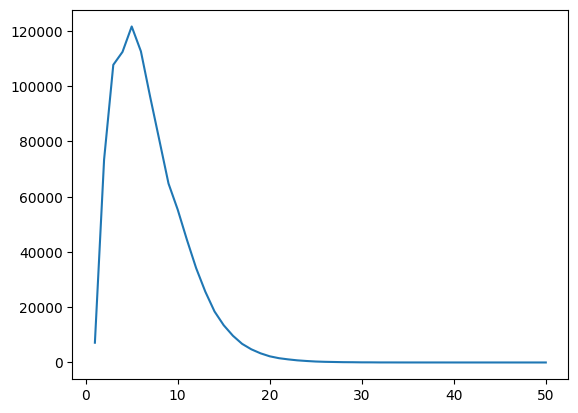

In [ ]:
def round_plot():
    round_counter = []
    n = 1000000
    for i in range(n):
        round_test = Round()
        rounds = round_test.run(log=0)[1]
        round_counter.append(rounds)
    round_dict = dict()
    for i in round_counter:
        if i in round_dict:
            round_dict[i] += 1
        else:
            round_dict[i] = 1
    x = list(round_dict.keys())
    x.sort()
    y = [round_dict[i] for i in x]
    print("Average round:", sum(round_counter) / n)

    import matplotlib.pyplot as plt
    plt.plot(x, y)
    plt.show()
round_plot()

Therefore, we can see the average of the number of rounds of our game is 6.94, and most of the games will end at about 5 rounds.

In [ ]:
num = 1000000
short = 0
more = 0
for i in range(num):
  round_test = Round()
  num_round = round_test.run(log=0)[1]
  if num_round <= 3:
    short += 1
  if num_round >= 15:
    more += 1
print("Number of rounds less than 3:", short)
print("Proportion:", short / num)
print("Number of rounds more than 15:", more)
print("Proportion:", more / num)

Number of rounds less than 3: 186826
Proportion: 0.186826
Number of rounds more than 15: 45411
Proportion: 0.045411


However, there are about 20% of the games end in 3 rounds and about 5% of the games end in more than 15 rounds.

#### Fairness evaluation

Computer versus computer can expand our confidence level, increase the randomness of the game when player using different strategies. Thus, we can conclude the win rate for each player.

Player 1 win rate: 50.03%
Player 2 win rate: 49.97%


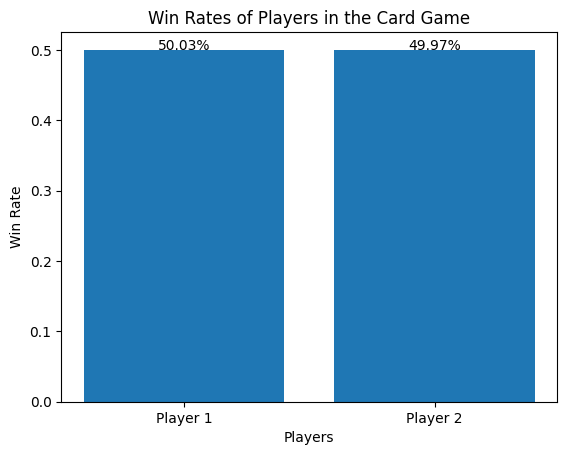

In [ ]:
import matplotlib.pyplot as plt
def test_game_fairness(num_games):
  p1_wins = 0
  p2_wins = 0
  for _ in range(num_games):
    round_test = Round()
    winner, _ = round_test.run(log=0)
    if winner == "p1":
      p1_wins += 1
    else:
      p2_wins += 1
  p1_win_rate = p1_wins / num_games
  p2_win_rate = p2_wins / num_games
  return p1_win_rate, p2_win_rate


def plot_win_rates(p1_win_rate, p2_win_rate):
  players = ['Player 1', 'Player 2']
  win_rates = [p1_win_rate, p2_win_rate]
  plt.bar(players, win_rates)
  plt.xlabel('Players')
  plt.ylabel('Win Rate')
  plt.title('Win Rates of Players in the Card Game')
  for i, v in enumerate(win_rates):
    plt.text(i, v, f'{v * 100:.2f}%', ha='center')
  plt.show()

num_games = 1000000
p1_win_rate, p2_win_rate = test_game_fairness(num_games)
print(f"Player 1 win rate: {p1_win_rate * 100:.2f}%")
print(f"Player 2 win rate: {p2_win_rate * 100:.2f}%")
plot_win_rates(p1_win_rate, p2_win_rate)

Therefore, we can see the probability of each player to win ais approximately the same, which means the game is fair.

## Game Update(Version2)

After the game evaluation, we discovered several improvements. Therefore, our objectives are in three folds.

Discoverd shortcoming:
1. From round distribution, outliers have discovered (above average rounds and below). Sometimes the game ends in 3 rounds and sometimes it takes 20 rounds to end.
2. Homogeneous game mode

Consideration:
- Minimizing extreme examples to ensure the game pace
- Increase gameplay  mode and make it more interesting
- Avoiding too long or too short game time and fairness

Improving objective:
1. Adjust game rules in each round to improve the gaming experience and avoid the gaming time being too long or too short.
2. Update the game type, add "armor", "evolution" game mode
3. Dynamically adjust the triggering probability of the mechanism and judgment card according to the number of rounds.

### Code of Version 2

#### Code

In [ ]:
import random as rd


class Card:

    def __init__(self, **kwargs):
        self.name = "card"
        self.value = 0

    def __str__(self):
        return self.name

    def execute(self, *players):
        pass


class Basic_Card(Card):

    def __init__(self, player, **kwargs):
        super().__init__()
        self.player = player
        self.type = kwargs["type"]


class Normal_Card(Basic_Card):

    def __init__(self, player, **kwargs):
        super().__init__(player, **kwargs)
        self.player = player

        self.range: str = kwargs["range"]  # "air" "land"
        # self.type: str = kwargs["type"]  # "def" "atk"
        self.name = " ".join([kwargs["type"], kwargs["range"], "card"])
        try:
            self.level: int = kwargs["level"]  # 1(low) 2(high)
            self.name = " ".join([kwargs["type"], str(kwargs["level"]), kwargs["range"], "card"])
        except KeyError:
            pass

        if self.type == "def":
            self.value = self.level
        elif self.type == "atk":
            self.value = - (2 + self.player.level)

    def execute(self, random_num, counter):
        if counter < 5:
            critical_value = 0.8
        elif counter < 8:
            critical_value = 0.5
        else:
            critical_value = 0.1

        if self.type == "def":
            self.value = self.level
        elif self.type == "atk":
            self.value = - (2 + self.player.level)

        if self.type == "def" and self.player.enemy.card.type == "atk" and self.range == self.player.enemy.card.range:
            if self.player.skill.type == "comprehensive_def":
                self.player.hp += 2
                self.player.skill.life = 0
            else:
                self.player.hp += self.value
        elif self.type == "def" and self.player.enemy.card.type == "atk" and self.range != self.player.enemy.card.range:
            if self.player.skill.type == "comprehensive_def":
                self.player.hp += 2
                self.player.skill.life = 0
            elif rd.random() < critical_value:
                self.player.hp += 1
                return True
        elif self.type == "atk" and self.player.enemy.card.type != "atk":
            self.player.enemy.hp += self.value
            self.player.add_damage(self.value)
        elif self.type == self.player.enemy.card.type == "atk":
            if self.player.skill.type == "fierce_attack" and self.player.enemy.skill.type != "fierce_attack":
                self.player.enemy.hp -= 1
                self.player.add_damage(1)
                self.player.skill.life = 0
            elif self.player.skill.type != "fierce_attack" and self.player.enemy.skill.type != "fierce_attack":
                self.player.enemy.hp += self.value
                self.player.add_damage(self.value)
            elif self.player.skill.type == "fierce_attack" and self.player.enemy.skill.type == "fierce_attack":
                self.player.enemy.hp -= 1
                self.player.add_damage(1)
                self.player.skill.life = 0
        elif self.type == self.player.enemy.card.type == "def":
            if random_num < critical_value:
                self.player.hp += 1
                return True
        return False


class Skill_Card(Basic_Card):
    """
    comprehensive_def, impeccable, first_aid, fierce_attack, none
    """

    def __init__(self, player, **kwargs):
        super().__init__(player, **kwargs)
        self.life = 2
        self.name = self.type + " card"

    def __str__(self):
        return self.name + " " + str(self.life)


class Judgement_Card(Card):

    def __init__(self):
        super().__init__()
        self.probability = 0.5

    def update(self, counter):
        if counter < 5:
            self.probability = 0.1
        elif counter < 8:
            self.probability = 0.5
        else:
            self.probability = 0.8


class Lightning_Card(Judgement_Card):

    def __init__(self):
        super().__init__()
        self.type = "lightning"
        self.name = " ".join([self.type, "card"])
        self.value = -1

    def execute(self, *players):
        if rd.random() < self.probability:
            for p in players:
                if p.skill.type == "impeccable":
                    p.skill.life = 0
                    return False
            player = rd.choice(players)
            player.hp += self.value
            return player.name
        return False

    def update(self, counter):
        if counter < 5:
            self.probability = 0.1
        elif counter < 8:
            self.probability = 0.75
        else:
            self.probability = 1


class Airstrike_Card(Judgement_Card):

    def __init__(self):
        super().__init__()
        self.type = "airstrike"
        self.name = " ".join([self.type, "card"])
        self.value = -1

    def execute(self, *players) -> bool:
        if rd.random() < self.probability:
            for p in players:
                if p.skill.type == "impeccable":
                    p.skill.life = 0
                    return False
            for p in players:
                p.hp += self.value
            return True
        return False


class Restore_Card(Judgement_Card):

    def __init__(self):
        super().__init__()
        self.type = "restore"
        self.name = " ".join([self.type, "card"])
        self.value = 1

    def execute(self, *players) -> bool:
        if rd.random() < self.probability:
            for p in players:
                if p.skill.type == "impeccable":
                    p.skill.life = 0
                    return False
            for p in players:
                p.hp += self.value
            return True
        return False

    def update(self, counter):
        if counter < 5:
            self.probability = 0.8
        elif counter < 8:
            self.probability = 0.5
        else:
            self.probability = 0.1


class Famine_Card(Judgement_Card):

    def __init__(self):
        super().__init__()
        self.type = "famine"
        self.name = " ".join([self.type, "card"])

    def execute(self, *players) -> bool:
        if rd.random() < self.probability:
            for p in players:
                if p.skill.type == "impeccable":
                    p.skill.life = 0
                    return False
            for p in players:
                if p.cards:
                    card_index = rd.randint(0, len(p.cards) - 1)
                    p.cards.pop(card_index)
            return True
        return False


class Player:

    def __init__(self, name="player"):
        self.name = name

        self.armor_origin = 4
        self.armor_max = self.armor_origin
        self.armor = self.armor_max
        self.blood_max = 6
        self.blood = self.blood_max
        self.hp_max = self.armor_max + self.blood_max
        self.hp = self.hp_max

        self.damage = 0
        self.level = 0
        self.level_up_damage = 3
        self.level_max = 3

        self.cards_max = 4
        self.cards = []
        self.skill = Skill_Card(self, type="none")
        self.enemy = None
        self.card = Normal_Card(self, type="none", range="")

    def __str__(self):
        return self.name

    def set_enemy(self, enemy):
        self.enemy = enemy

    def play_card(self, card_index):
        self.card = self.cards.pop(card_index)

    def get_basic_cards(self, num):
        for i in range(num):
            random_num = rd.random()
            if random_num < 0.6:
                rd_num = rd.random()
                if rd_num < 0.25:
                    self.cards.append(Normal_Card(self, type="atk", range="air"))
                elif rd_num < 0.5:
                    self.cards.append(Normal_Card(self, type="atk", range="land"))
                elif rd_num < 0.625:
                    self.cards.append(Normal_Card(self, type="def", level=1, range="air"))
                elif rd_num < 0.75:
                    self.cards.append(Normal_Card(self, type="def", level=2, range="air"))
                elif rd_num < 0.875:
                    self.cards.append(Normal_Card(self, type="def", level=1, range="land"))
                else:
                    self.cards.append(Normal_Card(self, type="def", level=2, range="land"))
            else:
                self.cards.append(rd.choice([Skill_Card(self, type="comprehensive_def"),
                                             Skill_Card(self, type="first_aid"),
                                             Skill_Card(self, type="impeccable"),
                                             Skill_Card(self, type="fierce_attack")]))

    def fold(self, card_index):
        try:
            self.cards.pop(card_index)
        except IndexError:
            pass

    def is_full(self) -> bool:
        return len(self.cards) > self.cards_max

    def update_hp(self):
        self.hp = min(self.hp, self.hp_max)
        if 0 >= self.hp == self.enemy.hp <= 0:
            self.hp = 1
            self.enemy.hp = 1

        d_hp = self.hp_max - self.hp
        self.armor = self.armor_max
        self.blood = self.blood_max
        while d_hp > 0:
            if self.armor > 0:
                self.armor -= 1
            else:
                self.blood -= 1
            d_hp -= 1

    def update_armor_max(self, counter):
        self.armor_max = max(0, self.armor_origin - counter)
        self.armor = min(self.armor_max, self.armor)
        self.hp_max = self.blood_max + self.armor_max
        self.hp = min(self.hp, self.hp_max)

    def update_level(self):
        self.level = min(self.damage // self.level_up_damage, self.level_max)

    def add_damage(self, value):
        self.damage += abs(value)

    def get_skill_cards(self) -> list:
        return [i for i in self.cards if isinstance(i, Skill_Card)]

    def get_normal_cards_index(self):
        return [i for i in range(len(self.cards)) if isinstance(self.cards[i], Normal_Card)]

    def skip(self):
        self.card = Normal_Card(self, type="skip", range="")


class Round:

    def __init__(self):
        self.player1 = Player("p1")
        self.player2 = Player("p2")
        self.player1.set_enemy(self.player2)
        self.player2.set_enemy(self.player1)
        self.players = [self.player1, self.player2]
        for p in self.players:
            p.get_basic_cards(2)
        self.counter = 0

    @staticmethod
    def get_judgement_card() -> Judgement_Card:
        return rd.choice([Airstrike_Card(), Famine_Card(), Lightning_Card(), Restore_Card()])

    def run(self, mode="c2c", log=1) -> tuple:
        """
        mode:
          "c2c": computer versus computer
            self.player1: computer
            self.player2: computer
          "c2p": computer versus player
            self.player1: computer
            self.player2: player
          "p2p": player versus player
            self.player1: player
            self.player2: player
        log:
          0: no log
          1: detailed log
          2: simple log
        """
        first_round = True
        while True:
            for p in self.players:
                p.update_armor_max(self.counter)
            self.counter += 1

            # Draw cards and fold
            if mode == "c2c":
                for p in self.players:
                    p.get_basic_cards(2)
                    while p.is_full():
                        p.fold(rd.randint(0, len(p.cards) - 1))
            elif mode == "p2p":
                for p in self.players:
                    p.get_basic_cards(2)
                    while True:
                        try:
                            if p.is_full():
                                p.fold(int(input("Please fold: " + str([str(i) for i in p.cards]))))
                                continue
                            else:
                                break
                        except Exception:
                            continue
            elif mode == "c2p":
                for p in self.players:
                    p.get_basic_cards(2)
                while self.player1.is_full():
                    self.player1.fold(rd.randint(0, len(self.player1.cards) - 1))
                while True:
                    try:
                        self.player2.fold(int(input("Please fold: " + str([str(i) for i in self.player2.cards]))))
                        if self.player2.is_full():
                            continue
                        else:
                            break
                    except Exception:
                        continue

            if log == 1:
                print("\nDraw cards:")
                print("\np1: " + str([str(i) for i in self.player1.cards]) + " | Skill: "
                      + str(self.player1.skill) + " | Blood: " + str(self.player1.blood) + " | Armor: "
                      + str(self.player1.armor) + " | Armor Max: " + str(self.player1.armor_max)
                      + " | Level: " + str(self.player1.level))
                print("\np2: " + str([str(i) for i in self.player2.cards]) + " | Skill: "
                      + str(self.player2.skill) + " | Blood: " + str(self.player2.blood) + " | Armor: "
                      + str(self.player2.armor) + " | Armor Max: " + str(self.player2.armor_max)
                      + " | Level: " + str(self.player2.level))
                print("\n")

            # Equip skills
            if mode == "c2c":
                for p in self.players:
                    skill_cards = p.get_skill_cards()
                    if skill_cards and rd.random() < 0.5:
                        p.skill = rd.choice(skill_cards)
                        p.cards.remove(p.skill)
            elif mode == "p2p":
                for p in self.players:
                    skill_cards = p.get_skill_cards()
                    while True:
                        user_input = input("Equip your skill: " + str([str(i) for i in skill_cards]))
                        if user_input != "none":
                            try:
                                p.skill = skill_cards[int(user_input)]
                            except Exception:
                                continue
                            p.cards.remove(p.skill)
                            break
                        elif user_input == "none":
                            break
            elif mode == "c2p":
                skill_cards = self.player1.get_skill_cards()
                if skill_cards and rd.random() < 0.5:
                    self.player1.skill = rd.choice(skill_cards)
                    self.player1.cards.remove(self.player1.skill)

                skill_cards = self.player2.get_skill_cards()
                while True:
                    user_input = input("Equip your skill: " + str([str(i) for i in skill_cards]))
                    if user_input != "none":
                        try:
                            p.skill = skill_cards[int(user_input)]
                        except Exception:
                            continue
                        p.cards.remove(p.skill)
                        break
                    elif user_input == "none":
                        break

            if log == 1:
                print("Equip skills:")
                print("\np1: " + str([str(i) for i in self.player1.cards]) + " | Skill: "
                      + str(self.player1.skill) + " | Blood: " + str(self.player1.blood) + " | Armor: "
                      + str(self.player1.armor) + " | Armor Max: " + str(self.player1.armor_max)
                      + " | Level: " + str(self.player1.level))
                print("\np2: " + str([str(i) for i in self.player2.cards]) + " | Skill: "
                      + str(self.player2.skill) + " | Blood: " + str(self.player2.blood) + " | Armor: "
                      + str(self.player2.armor) + " | Armor Max: " + str(self.player2.armor_max)
                      + " | Level: " + str(self.player2.level))
                print("\n")

            # Play cards
            # Player1
            if not (self.player1.get_normal_cards_index() == []):
                if mode == "c2c" or mode == "c2p":
                    index1 = rd.choice(self.player1.get_normal_cards_index())
                    self.player1.play_card(index1)
                elif mode == "p2p":
                    while True:
                        try:
                            index1 = int(input("Play your cards: " + str([str(i) for i in self.player1.cards])))
                            if isinstance(self.player1.cards[index1], Normal_Card):
                                break
                        except Exception:
                            continue
                    self.player1.play_card(index1)
            else:
                self.player1.skip()

            # Player2
            if not (self.player2.get_normal_cards_index() == []):
                if mode == "c2c":
                    index2 = rd.choice(self.player2.get_normal_cards_index())
                    self.player2.play_card(index2)
                elif mode == "p2p" or mode == "c2p":
                    while True:
                        try:
                            index2 = int(input("Play your cards: " + str([str(i) for i in self.player2.cards])))
                            if isinstance(self.player2.cards[index2], Normal_Card):
                                break
                        except Exception:
                            continue
                    self.player2.play_card(index2)
            else:
                self.player2.skip()

            # Cards execute
            random_num = rd.random()
            mechanism1 = self.player1.card.execute(random_num, self.counter)
            mechanism2 = self.player2.card.execute(random_num, self.counter)
            mechanism = mechanism1 or mechanism2

            # Judgement
            j_card = self.get_judgement_card()
            j_card.update(self.counter)

            # prophecy
            p1_prophecy = p2_prophecy = "none"
            if first_round:
                origin_valid_choices = ["airstrike card", "famine card", "lightning card", "restore card"]  # for player
                valid_choices = origin_valid_choices + ["none"] * 4  # for computer
                if mode == "c2c":
                    p1_choice = rd.randint(0, 7)
                    p2_choice = rd.randint(0, 7)
                    if valid_choices[int(p1_choice)] != "none":
                        p1_prophecy = "success" if valid_choices[int(p1_choice)] == str(j_card) else "fail"
                    if valid_choices[int(p2_choice)] != "none":
                        p2_prophecy = "success" if valid_choices[int(p2_choice)] == str(j_card) else "fail"
                elif mode == "p2p":
                    while True:
                        p1_choice = input("Please make your prophecy: " + str(origin_valid_choices))
                        try:
                            if p1_choice != "none":
                                p1_prophecy = "success" if origin_valid_choices[int(p1_choice)] == str(j_card) else "fail"
                            break
                        except Exception:
                            continue
                    while True:
                        p2_choice = input("Please make your prophecy: " + str(origin_valid_choices))
                        try:
                            if p2_choice != "none":
                                p2_prophecy = "success" if origin_valid_choices[int(p2_choice)] == str(j_card) else "fail"
                            break
                        except Exception:
                            continue
                elif mode == "c2p":
                    p1_choice = rd.randint(0, 7)
                    if valid_choices[int(p1_choice)] != "none":
                        p1_prophecy = "success" if valid_choices[int(p1_choice)] == str(j_card) else "fail"
                    while True:
                        p2_choice = input("Please make your prophecy: " + str(origin_valid_choices))
                        try:
                            if p2_choice != "none":
                                p2_prophecy = "success" if origin_valid_choices[int(p2_choice)] == str(j_card) else "fail"
                            break
                        except Exception:
                            continue
                if p1_prophecy == "success":
                    self.player2.hp -= 1
                elif p1_prophecy == "fail":
                    self.player1.hp -= 1
                if p2_prophecy == "success":
                    self.player1.hp -= 1
                elif p2_prophecy == "fail":
                    self.player2.hp -= 1

            j_result = j_card.execute(self.player1, self.player2)

            for p in self.players:
                if p.skill.type == "first_aid" and p.hp <= 0:
                    p.hp = 1
                    p.skill.life = 0
                p.update_hp()
                p.update_level()
                if p.skill.type != "none":
                    p.skill.life -= 1
                    if p.skill.life <= 0:
                        p.skill = Skill_Card(p, type="none")

            if log == 1:
                print("End of the round:")
                print("\np1: " + str([str(i) for i in self.player1.cards]) + " | Skill: " + str(self.player1.skill) + " | Card: " + str(self.player1.card)
                      + " | Blood: " + str(self.player1.blood) + " | Armor: " + str(self.player1.armor) + " | Armor Max: " + str(self.player1.armor_max)
                      + " | Level: " + str(self.player1.level) + " | HP:" + str(self.player1.hp))
                print("\np2: " + str([str(i) for i in self.player2.cards]) + " | Skill: " + str(self.player2.skill) + " | Card: " + str(self.player2.card)
                      + " | Blood: " + str(self.player2.blood) + " | Armor: " + str(self.player2.armor) + " | Armor Max: " + str(self.player2.armor_max)
                      + " | Level: " + str(self.player2.level) + " | HP:" + str(self.player2.hp))
                print("\n" + str(j_card) + " -> " + str(j_result))
                if first_round:
                    print("p1 prophecy:", p1_prophecy)
                    print("p2 prophecy:", p2_prophecy)
                print("\nmechanism -> " + str(mechanism))
                print("-----------------------------------------------------------------------------------------------")

            first_round = False

            if self.player1.hp <= 0 and self.player1.hp < self.player2.hp:
                if log == 2 or log == 1:
                    print("\n\n=========================================================================================\n")
                    print("p2 win.")
                    print("Total round:", self.counter)
                return "p2", self.counter
            elif self.player2.hp <= 0 and self.player2.hp < self.player1.hp:
                if log == 2 or log == 1:
                    print("\n\n=========================================================================================\n")
                    print("p1 win.")
                    print("Total round:", self.counter)
                return "p1", self.counter

#### Explaination

In our new game, we add these items:

1. Player HP is now made up of these two parts: blood (6 point) and armor.
  - The initial armor limit is 4 points. After each round of the game, the armor limit decreases by 1 until it reaches 0.
  - When a player is being damaged, the armor value is being damaged first, and then the blood value.
  - When a player restores, blood is restored first before armor.
2. Player's level system:
  - The initial level is 0;
  - When the player causes 3 points of total damage to the enemy, he can upgrade to a higher level.
  - Each time the player upgrades a level, the damage of the player's attack card increases by 1.
  - The maximum of the level is 3.
3. Dynamic probabilities:
  - Compared to version 1, we have adjusted the probability of judgment cards, making it easier for players to lose HP through judgment cards in the later stages of the game.
  - Set the probability of the mechanic to change dynamically according to the number of rounds, making it easier to trigger in the early game and harder to trigger in the late game.

### Evaluation of Version 2

##### Round Distribution

Number of rounds per each game will be calculated.

Average round: 8.31592


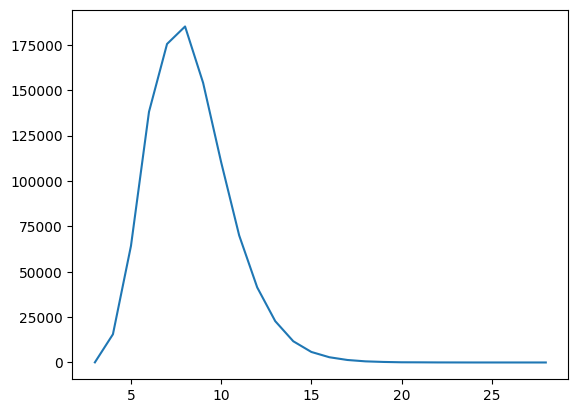

In [ ]:
def round_plot():
    round_counter = []
    n = 1000000
    for i in range(n):
        round_test = Round()
        rounds = round_test.run(log=0)[1]
        round_counter.append(rounds)
    round_dict = dict()
    for i in round_counter:
        if i in round_dict:
            round_dict[i] += 1
        else:
            round_dict[i] = 1
    x = list(round_dict.keys())
    x.sort()
    y = [round_dict[i] for i in x]
    print("Average round:", sum(round_counter) / n)

    import matplotlib.pyplot as plt
    plt.plot(x, y)
    plt.show()
round_plot()

Therefore, we can see the average of the number of rounds of our game is about 8, and most of the games will end at about 8 rounds.

In [ ]:
num = 1000000
short = 0
more = 0
for i in range(num):
  round_test = Round()
  num_round = round_test.run(log=0)[1]
  if num_round <= 3:
    short += 1
  if num_round >= 15:
    more += 1
print("Number of rounds less than 3:", short)
print("Proportion:", short / num)
print("Number of rounds more than 15:", more)
print("Proportion:", more / num)

Number of rounds less than 3: 75
Proportion: 7.5e-05
Number of rounds more than 15: 11316
Proportion: 0.011316


Therefore, we can see that our version 2 have had less outliers. Almost no games will ends in 3 rounds and only about 1% of the games will ends in more than 15 rounds, which can provide a better game experience for players.

##### Fairness Evaluation

Computer versus computer can expand our confidence level, increase the randomness of the game when player using different strategies. Thus, we can conclude the win rate for each player.

Player 1 win rate: 50.32%
Player 2 win rate: 49.68%


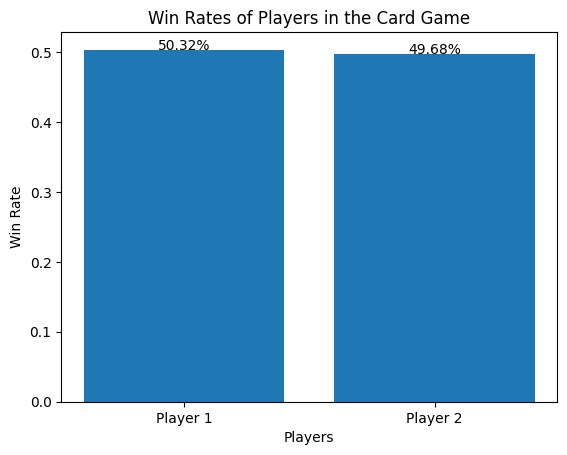

In [ ]:
import matplotlib.pyplot as plt
def test_game_fairness(num_games):
  p1_wins = 0
  p2_wins = 0
  for _ in range(num_games):
    round_test = Round()
    winner, _ = round_test.run(log=0)
    if winner == "p1":
      p1_wins += 1
    else:
      p2_wins += 1
  p1_win_rate = p1_wins / num_games
  p2_win_rate = p2_wins / num_games
  return p1_win_rate, p2_win_rate


def plot_win_rates(p1_win_rate, p2_win_rate):
  players = ['Player 1', 'Player 2']
  win_rates = [p1_win_rate, p2_win_rate]
  plt.bar(players, win_rates)
  plt.xlabel('Players')
  plt.ylabel('Win Rate')
  plt.title('Win Rates of Players in the Card Game')
  for i, v in enumerate(win_rates):
    plt.text(i, v, f'{v * 100:.2f}%', ha='center')
  plt.show()

num_games = 1000000
p1_win_rate, p2_win_rate = test_game_fairness(num_games)
print(f"Player 1 win rate: {p1_win_rate * 100:.2f}%")
print(f"Player 2 win rate: {p2_win_rate * 100:.2f}%")
plot_win_rates(p1_win_rate, p2_win_rate)

Therefore, we can see the probability of each player to win ais approximately the same, which means the game is fair.

## Summary

In summary, we developed a card game with multiple elements, which is fair and can provide players a good gaming experience.

In version 1, we built the main body of our game. And then, in version 2, we found some disadvantages such as the outliers of the number of the game rounds, which may have a negative influence on gaming experience. Therefore, we modified our game to make it better.